# Enviornment Setup

In [2]:
# Import our usual packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import some useful packages from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
# To reproduce our results please run the following code
# We made our data file sharable for ease of access

!wget -O dataset.csv 'https://drive.google.com/uc?export=download&id=1NORUT9-MApfEmpyahk7Nm1oYI14Ztnjm'
df = pd.read_csv('dataset.csv')

df.info()

In [3]:
# Only for team members, please do not run

from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/BA305/airline_passenger_satisfaction_data.csv')

df.info()


Mounted at /content/drive/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location              

# Data Preprocessing

In [4]:
df.columns = [x.replace(' ', '_') for x in df.columns]
df['satisfaction'] = df['satisfaction'].astype(int)
df['Customer_Type'] = df['Customer_Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})
df['Type_of_Travel'] = df['Type_of_Travel'].map({'Personal Travel': 0, 'Business travel': 1})
df['Class'] = df['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df = df.dropna(subset=['Arrival_Delay_in_Minutes'])
df.reset_index(drop=True, inplace=True)

print(df.shape)
df.head()


(25893, 25)


,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,19556,0,0,52,1,0,160,5,4,...,5,5,5,5,2,5,5,50,44.0,0
1,1,90035,0,0,36,1,2,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,0
2,2,12360,1,1,20,1,0,192,2,0,...,2,4,1,3,2,2,2,0,0.0,1
3,3,77959,1,0,44,1,2,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,0
4,4,36875,0,0,49,1,0,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,0


In [5]:
average = df['satisfaction'].mean()
print(average)
print("Baseline Accuracy:", 1 - average)

0.561078283706021
Baseline Accuracy: 0.438921716293979


In [6]:
cols = ['id', 'Unnamed:_0','Age','Gender','Type_of_Travel','Class','Customer_Type','Flight_Distance','Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes']
air_mdf = df.drop(cols, axis =1)
air_mdf = air_mdf.dropna(how='any')
air_mdf = air_mdf.reset_index(drop=True)

print(air_mdf.shape)
air_mdf.head()

(25893, 15)


,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,0
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,1
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0


# Visualization

In [7]:
corr_mat = air_mdf.corr()
corr_mat

,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
Inflight_wifi_service,1.000000,0.349135,0.711115,0.348154,0.122242,0.459132,0.116454,0.201438,0.114220,0.160130,0.118509,0.046528,0.109033,0.125269,-0.279884
Departure/Arrival_time_convenient,0.349135,1.000000,0.440375,0.458575,-0.015291,0.080899,-0.002014,-0.022097,0.060832,0.003372,0.065641,0.082893,0.068011,-0.007069,0.065266
Ease_of_Online_booking,0.711115,0.440375,1.000000,0.465729,0.025494,0.408320,0.022989,0.044636,0.040162,0.116888,0.040663,0.000458,0.035462,0.011044,-0.157634
Gate_location,0.348154,0.458575,0.465729,1.000000,-0.009410,0.007060,-0.001054,-0.000478,-0.031421,-0.002276,-0.004203,-0.054576,-0.005238,-0.014203,0.016350
Food_and_drink,0.122242,-0.015291,0.025494,-0.009410,1.000000,0.229630,0.581687,0.627343,0.051349,0.036415,0.037821,0.077276,0.040729,0.659562,-0.217098
Online_boarding,0.459132,0.080899,0.408320,0.007060,0.229630,1.000000,0.415573,0.279317,0.149972,0.120653,0.084620,0.204200,0.072275,0.320761,-0.494322
Seat_comfort,0.116454,-0.002014,0.022989,-0.001054,0.581687,0.415573,1.000000,0.617282,0.125119,0.099455,0.074870,0.183003,0.067759,0.684364,-0.346398
Inflight_entertainment,0.201438,-0.022097,0.044636,-0.000478,0.627343,0.279317,0.617282,1.000000,0.412914,0.303444,0.383025,0.115111,0.411787,0.695487,-0.398884
On-board_service,0.114220,0.060832,0.040162,-0.031421,0.051349,0.149972,0.125119,0.412914,1.000000,0.366787,0.525032,0.247695,0.554417,0.118103,-0.321844
Leg_room_service,0.160130,0.003372,0.116888,-0.002276,0.036415,0.120653,0.099455,0.303444,0.366787,1.000000,0.379323,0.151275,0.373455,0.098271,-0.310092


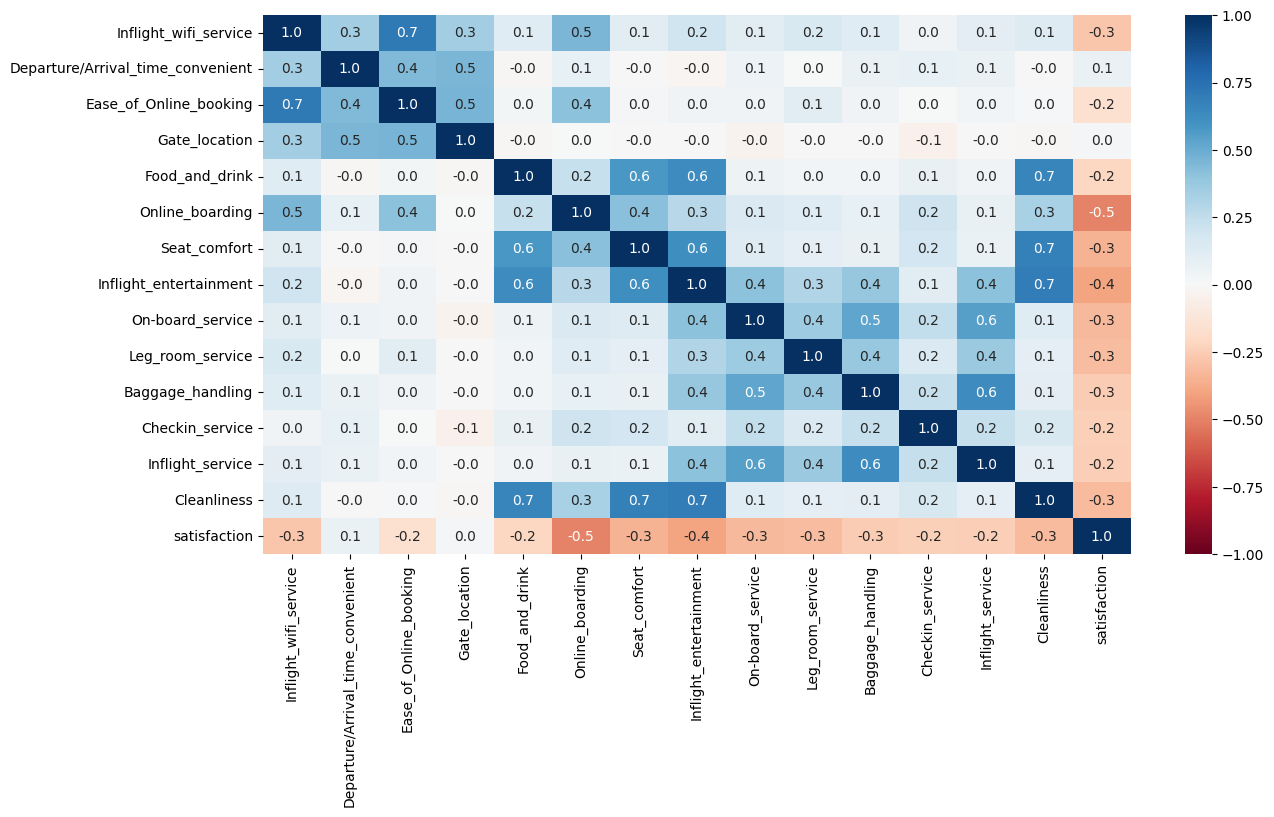

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');

# Train-Test-Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = air_mdf.drop('satisfaction', axis=1)  # Features
y = air_mdf['satisfaction']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the indices
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (20714, 14) (20714,)
Testing set shape: (5179, 14) (5179,)


In [11]:
prop_y_orig = sum(y)/len(y);
prop_y_train = sum(y_train)/len(y_train);
prop_y_test = sum(y_test)/len(y_test);

print("% of 1's in orig dataset=", prop_y_orig)
print("% of 1's in y_train=", prop_y_train)
print("% of 1's in y_test=", prop_y_test)

% of 1's in orig dataset= 0.561078283706021
% of 1's in y_train= 0.5618422323066525
% of 1's in y_test= 0.5580227843212976


# PCA

In [12]:
# Scale the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Fit PCA on the scaled training data
pcs = PCA()
pcs.fit(X_train_scaled)

# Summary of PCA
pcsSummary_df = pd.DataFrame({
    'Proportion of variance': pcs.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
})
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.271,0.271
1,0.172,0.443
2,0.156,0.599
3,0.076,0.675
4,0.067,0.743
5,0.049,0.791
6,0.038,0.829
7,0.036,0.865
8,0.033,0.898
9,0.026,0.924


                                    PC1   PC2   PC3   PC4   PC5   PC6   PC7  \
Inflight_wifi_service             -0.23 -0.45  0.06 -0.19 -0.23  0.10  0.21   
Departure/Arrival_time_convenient -0.09 -0.42 -0.01  0.30  0.41  0.02 -0.63   
Ease_of_Online_booking            -0.16 -0.53  0.06 -0.12 -0.15  0.02  0.13   
Gate_location                     -0.06 -0.43  0.06  0.47  0.15 -0.17  0.34   
Food_and_drink                    -0.31  0.17  0.35  0.20 -0.00  0.00  0.14   
Online_boarding                   -0.28 -0.16  0.17 -0.60 -0.10  0.17 -0.19   
Seat_comfort                      -0.34  0.16  0.32 -0.01  0.10 -0.06 -0.17   
Inflight_entertainment            -0.43  0.17  0.08  0.22 -0.15  0.06  0.04   
On-board_service                  -0.28  0.05 -0.38  0.00 -0.01  0.22 -0.39   
Leg_room_service                  -0.23  0.00 -0.30 -0.05 -0.31 -0.84 -0.16   
Baggage_handling                  -0.27  0.04 -0.43  0.10 -0.00  0.21  0.22   
Checkin_service                   -0.18  0.05 -0.14 

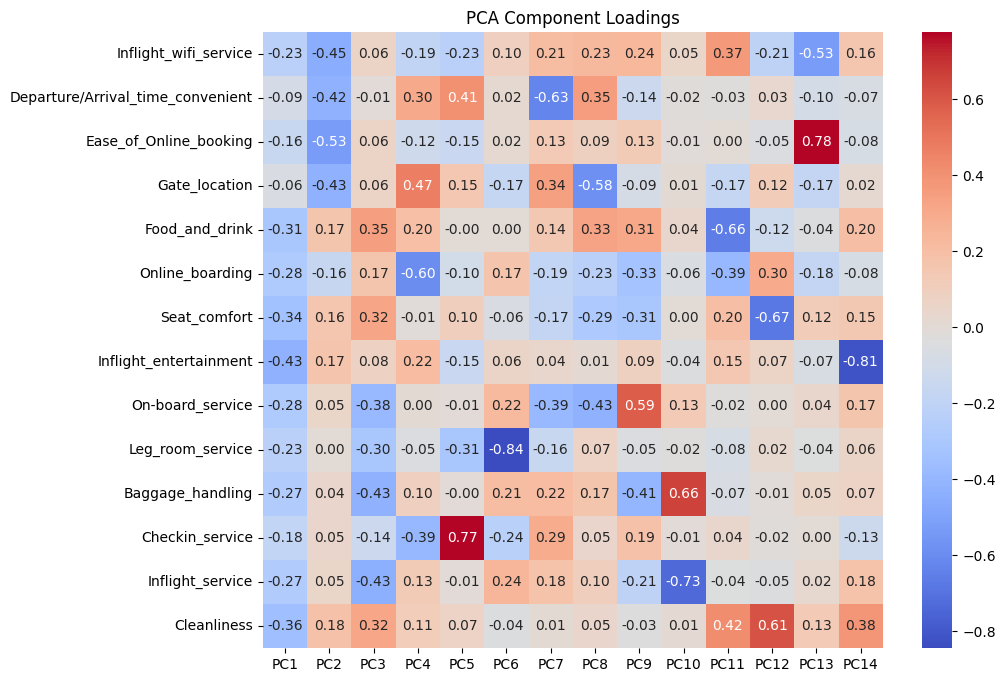

In [14]:
loadings = pcs.components_.transpose()
loading_matrix = pd.DataFrame(loadings, index=X_train.columns, columns=[f'PC{i+1}' for i in range(pcs.n_components_)])
print(loading_matrix.round(2))

# Visualizing the loading matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('PCA Component Loadings')
plt.show()

# Transforming the training and testing data
principalComponents_train = pcs.transform(X_train_scaled)
principalComponents_test = pcs.transform(X_test_scaled)

[3.79 2.41 2.19 1.07 0.94 0.68 0.53 0.51 0.46 0.36 0.33 0.29 0.26 0.18]


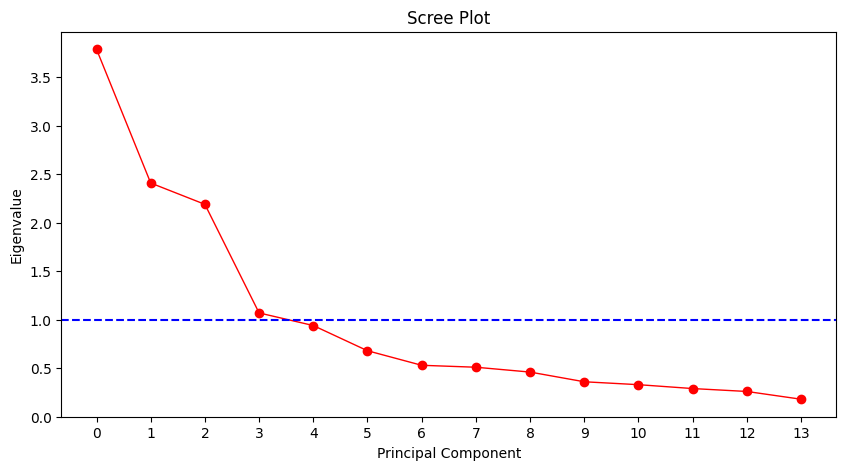

In [15]:
# Eigenvalues and Scree Plot
eig = pcs.explained_variance_.round(2)
print(eig)

xvals = np.arange(X_train.shape[1])
plt.figure(figsize=(10,5))
plt.plot(xvals, eig, 'ro-', linewidth=1)
plt.xticks(xvals)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='b', linestyle='--')
plt.show()


In [16]:
# Selecting n_components=4 based on the Scree plot
pcs = PCA(n_components=4)
principalComponents_train = pcs.fit_transform(X_train_scaled)
principalComponents_test = pcs.transform(X_test_scaled)

component_names = ['Inflight_Discomfort_Factor', 'Digital_Convenience_and_Logistics_Discontent_Factor',
                   'Service_Quality_Discontent_Factor', 'Online_Boarding_and_Check-in_Inefficiency']
principalDF_train = pd.DataFrame(data=principalComponents_train.round(2), columns=component_names)
principalDF_test = pd.DataFrame(data=principalComponents_test.round(2), columns=component_names)

principalDF_train
#principalDF_test

,Inflight_Discomfort_Factor,Digital_Convenience_and_Logistics_Discontent_Factor,Service_Quality_Discontent_Factor,Online_Boarding_and_Check-in_Inefficiency
0,2.28,-0.99,-3.01,0.47
1,0.27,-1.35,0.13,0.16
2,-2.68,-2.33,0.38,0.02
3,0.01,-1.00,-1.35,-0.72
4,1.41,0.24,-2.02,0.52
...,...,...,...,...
20709,0.85,-3.76,-2.01,-1.83
20710,2.37,0.12,-0.33,-1.11
20711,0.94,2.32,0.83,1.59
20712,-0.17,0.30,-0.29,2.08


In [17]:
# Reintegrating selected original features
selected_features = ['Age', 'Gender', 'Type_of_Travel', 'Class', 'Customer_Type', 'Flight_Distance', 'Departure_Delay_in_Minutes']
X_train_selected = df.loc[X_train.index, selected_features].reset_index(drop=True)
X_test_selected = df.loc[X_test.index, selected_features].reset_index(drop=True)

# Concatenate PCA components with selected features
X_train_final = pd.concat([principalDF_train.reset_index(drop=True), X_train_selected.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([principalDF_test.reset_index(drop=True), X_test_selected.reset_index(drop=True)], axis=1)

print(X_train_final.shape)
print(X_test_final.shape)

(20714, 11)
(5179, 11)


In [18]:
X_train.head()

,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,2,5,2,3,1,2,1,1,4,4,4,3,5,1
1,3,4,4,4,3,3,3,3,2,4,3,4,4,3
2,5,5,5,5,3,4,5,4,4,4,4,5,4,5
3,4,3,3,3,1,4,3,4,4,4,4,3,4,2
4,2,0,2,5,2,2,2,2,5,4,3,3,5,2


In [19]:
X_train = X_train_final
X_test = X_test_final

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20714 entries, 0 to 20713
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Inflight_Discomfort_Factor                           20714 non-null  float64
 1   Digital_Convenience_and_Logistics_Discontent_Factor  20714 non-null  float64
 2   Service_Quality_Discontent_Factor                    20714 non-null  float64
 3   Online_Boarding_and_Check-in_Inefficiency            20714 non-null  float64
 4   Age                                                  20714 non-null  int64  
 5   Gender                                               20714 non-null  int64  
 6   Type_of_Travel                                       20714 non-null  int64  
 7   Class                                                20714 non-null  int64  
 8   Customer_Type                                        20714 non-nul

In [20]:
print(y_train.index.equals(X_train.index))

True


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, KFold

In [83]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8086503185943232


In [87]:
results = []
for k in tqdm(range(1, 20, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)

    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

100%|██████████| 19/19 [00:31<00:00,  1.66s/it]


,k,accuracy
0,1,0.766750
1,2,0.756517
2,3,0.793010
3,4,0.794169
4,5,0.808650
5,6,0.811354
6,7,0.813284
7,8,0.814443
8,9,0.816760
9,10,0.816760


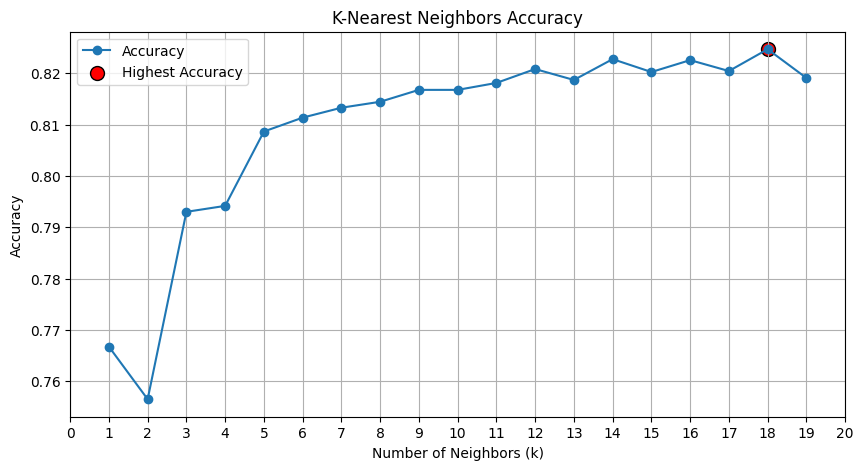

In [88]:
# finding which k yields highest accuracy
max_accuracy = results_df['accuracy'].max()
best_k = results_df[results_df['accuracy'] == max_accuracy]['k'].values[0]

# plotting
plt.figure(figsize=(10, 5), facecolor='white')
plt.plot(results_df['k'], results_df['accuracy'], marker='o', label='Accuracy')
plt.scatter(best_k, max_accuracy, color='red', s=100, edgecolor='black', label='Highest Accuracy')
plt.title('K-Nearest Neighbors Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(0, 21, 1))
plt.grid(True)
plt.legend()
plt.show()

In [26]:
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

Max value = 0.824676578490056 |  Best k = 18


In [27]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_scaled, y_train)

pred_y = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, pred_y))
print('Accuracy:', accuracy_score(y_test, pred_y))

[[1782  507]
 [ 401 2489]]
Accuracy: 0.824676578490056


In [28]:
cm = confusion_matrix(y_test,pred_y)
cm

array([[1782,  507],
       [ 401, 2489]])

In [29]:
isabel = pd.DataFrame([
    {
        'Inflight_Discomfort_Factor': -2.57,
        'Digital_Convenience_and_Logistics_Discontent_Factor':-3,
        'Service_Quality_Discontent_Factor':-1.11,
        'Online_Boarding_and_Check-in_Inefficiency':0.89,
        'Age': 54,
        'Gender': 0,
        'Type_of_Travel': 1,
        'Class': 0,
        'Customer_Type': 0,
        'Flight_Distance': 192,
        'Departure_Delay_in_Minutes': 0
    }
])

In [30]:
# Scale Isabel's data
newCustomerNorm = scaler.transform(isabel)

In [31]:
# Satisfied = 0, Neutral or Dissatisfied = 1

predicted_class = knn.predict(newCustomerNorm)
predicted_proba = knn.predict_proba(newCustomerNorm)

print(f'Predicted Class: {predicted_class[0]}')
print(f'Predicted Probability: {predicted_proba[0]}')

Predicted Class: 0
Predicted Probability: [1. 0.]


# KNN-Evaluation

In [32]:
cmn=confusion_matrix(y_test,y_pred, normalize='true');
cmn

array([[0.74705111, 0.25294889],
       [0.14256055, 0.85743945]])

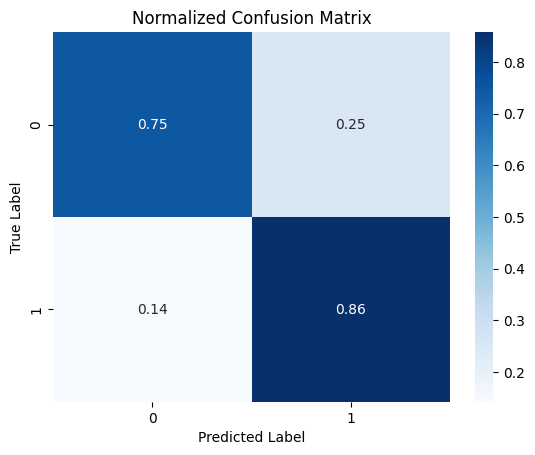

In [33]:
sns.heatmap(cmn, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [34]:
tot = len(y_test) #total patients in test set
p = sum(y_test) #actual positives
n = tot-p #actual negatives
pp = sum(y_pred) #predicted positives
pn = tot - pp #predicted negatives

tp = cm[1,1]; # true positives
tn = cm[0,0]; # true negatives
fp = cm[0,1]; # false positives
fn = cm[1,0]; # false negatives

print('total patients =',tot, )
print('actual positives =', p, '|', 'actual negatives =', n,)
print('predicted positives =', pp, '|', 'predicted negatives =', pn)
print('true positives = ', tp, '|', 'false positives =', fp, '|', 'true negatives = ', tn, '|', 'false negatives = ', fn)

# Manual computations
m_acc = (tp + tn) / tot #accuracy
tpr = tp / p # true positive rate
fpr = fp / n # false positive rate

print('Accuracy = ', m_acc.round(2), ',', 'TPR =', tpr.round(2), ',', "FPR =", fpr.round(2))

total patients = 5179
actual positives = 2890 | actual negatives = 2289
predicted positives = 3057 | predicted negatives = 2122
true positives =  2489 | false positives = 507 | true negatives =  1782 | false negatives =  401
Accuracy =  0.82 , TPR = 0.86 , FPR = 0.22


In [35]:
# Define a value matrix (aka, cost matrix, or benefit matrix)
val_matrix = np.array([[1, -1], [-5, 2]]);
val_matrix

array([[ 1, -1],
       [-5,  2]])

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [38]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[1750,  539],
       [ 512, 2378]])

In [39]:
accuracy_score(y_test, y_pred)

0.7970650704769261

In [40]:
p_pred=lr.predict_proba(X_test)[:,1]

cutoff = 0.45
y_pred_new=[1 if i > cutoff else 0 for i in p_pred]
accuracy_score(y_test, y_pred_new)


0.8007337323807685

In [41]:
cm=confusion_matrix(y_test,y_pred_new)
cm

array([[1671,  618],
       [ 414, 2476]])

In [42]:
tot = len(y_test) #total patients in test set
p = sum(y_test) #actual positives
n = tot-p #actual negatives
pp = sum(y_pred_new) #predicted positives
pn = tot - pp #predicted negatives

tp = cm[1,1]; # true positives
tn = cm[0,0]; # true negatives
fp = cm[0,1]; # false positives
fn = cm[1,0]; # false negatives

print('total passengers =',tot, )
print('actual positives =', p, '|', 'actual negatives =', n,)
print('predicted positives =', pp, '|', 'predicted negatives =', pn)
print('true positives = ', tp, '|', 'false positives =', fp, '|', 'true negatives = ', tn, '|', 'false negatives = ', fn)

# Manual computations
m_acc = (tp + tn) / tot #accuracy
tpr = tp / p # true positive rate
fpr = fp / n # false positive rate

print('Accuracy = ', m_acc.round(2), ',', 'TPR =', tpr.round(2), ',', "FPR =", fpr.round(2))

total passengers = 5179
actual positives = 2890 | actual negatives = 2289
predicted positives = 3094 | predicted negatives = 2085
true positives =  2476 | false positives = 618 | true negatives =  1671 | false negatives =  414
Accuracy =  0.8 , TPR = 0.86 , FPR = 0.27


# Logistic Regression--Interpreting Result

In [43]:
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=X_test.columns))

intercept  0.13312431361841442
                                                       coeff
Inflight_Discomfort_Factor                          0.792749
Digital_Convenience_and_Logistics_Discontent_Fa... -0.024705
Service_Quality_Discontent_Factor                   0.026804
Online_Boarding_and_Check-in_Inefficiency           0.769302
Age                                                 0.003989
Gender                                              0.043242
Type_of_Travel                                      0.048584
Class                                               0.015568
Customer_Type                                       0.073603
Flight_Distance                                     0.000013
Departure_Delay_in_Minutes                          0.001060


In [44]:
import math

In [45]:
print( math.exp(lr_coef[0]) )
print( math.exp(lr_coef[1]) )

2.209462050995813
0.9755976732347017


A positive coefficient in the logit model translates into a coefficient larger than 1 in the odds model. In the logit model, the estimated coefficient for Low_Inflight_Comfort_&_Quality is 0.78. In the odds model, the coefficient is e^0.78 = 2.18. This means that an increase of a unit in Low_Inflight_Comfort_&_Quality is associated with an increase in the odds of being unsatisfied by a factor of 3.26. Conversely, and extra unit of Unconvenience_and_Inefficiency only increases the odds of being unsatisfied by a factor of 0.94...

In [46]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

logit_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(logit_reg.params)
print(logit_reg.summary())

Optimization terminated successfully.
         Current function value: 0.473662
         Iterations 6
const                                                  0.396216
Inflight_Discomfort_Factor                             0.798917
Digital_Convenience_and_Logistics_Discontent_Factor   -0.022528
Service_Quality_Discontent_Factor                      0.049853
Online_Boarding_and_Check-in_Inefficiency              0.783202
Age                                                    0.000787
Gender                                                -0.006672
Type_of_Travel                                        -0.017084
Class                                                  0.018558
Customer_Type                                          0.046677
Flight_Distance                                       -0.000001
Departure_Delay_in_Minutes                             0.000169
dtype: float64
                           Logit Regression Results                           
Dep. Variable:           satisfactio

# Decision Tree

In [76]:
# import required packages
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *

In [77]:
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 79.2 %


In [79]:
clf = DecisionTreeClassifier(
      max_depth=10,
      min_samples_split = 40,
      min_samples_leaf = 20,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

In [80]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Accuracy score of reduced tree on train data:", accuracy_score(y_train, y_pred_train)*100, "%")
print("Accuracy score of reduced tree on test data:", accuracy_score(y_test, y_pred_test)*100, "%")

print("Confusion Matrix of reduced tree on train data:")
print(confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix of reduced tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy score of reduced tree on train data: 80.5059380129381 %
Accuracy score of reduced tree on test data: 79.33964085730835 %
Confusion Matrix of reduced tree on train data:
[[7072 2004]
 [2034 9604]]
Confusion Matrix of reduced tree on test data:
[[1764  525]
 [ 545 2345]]


In [81]:
X.shape

(25893, 14)

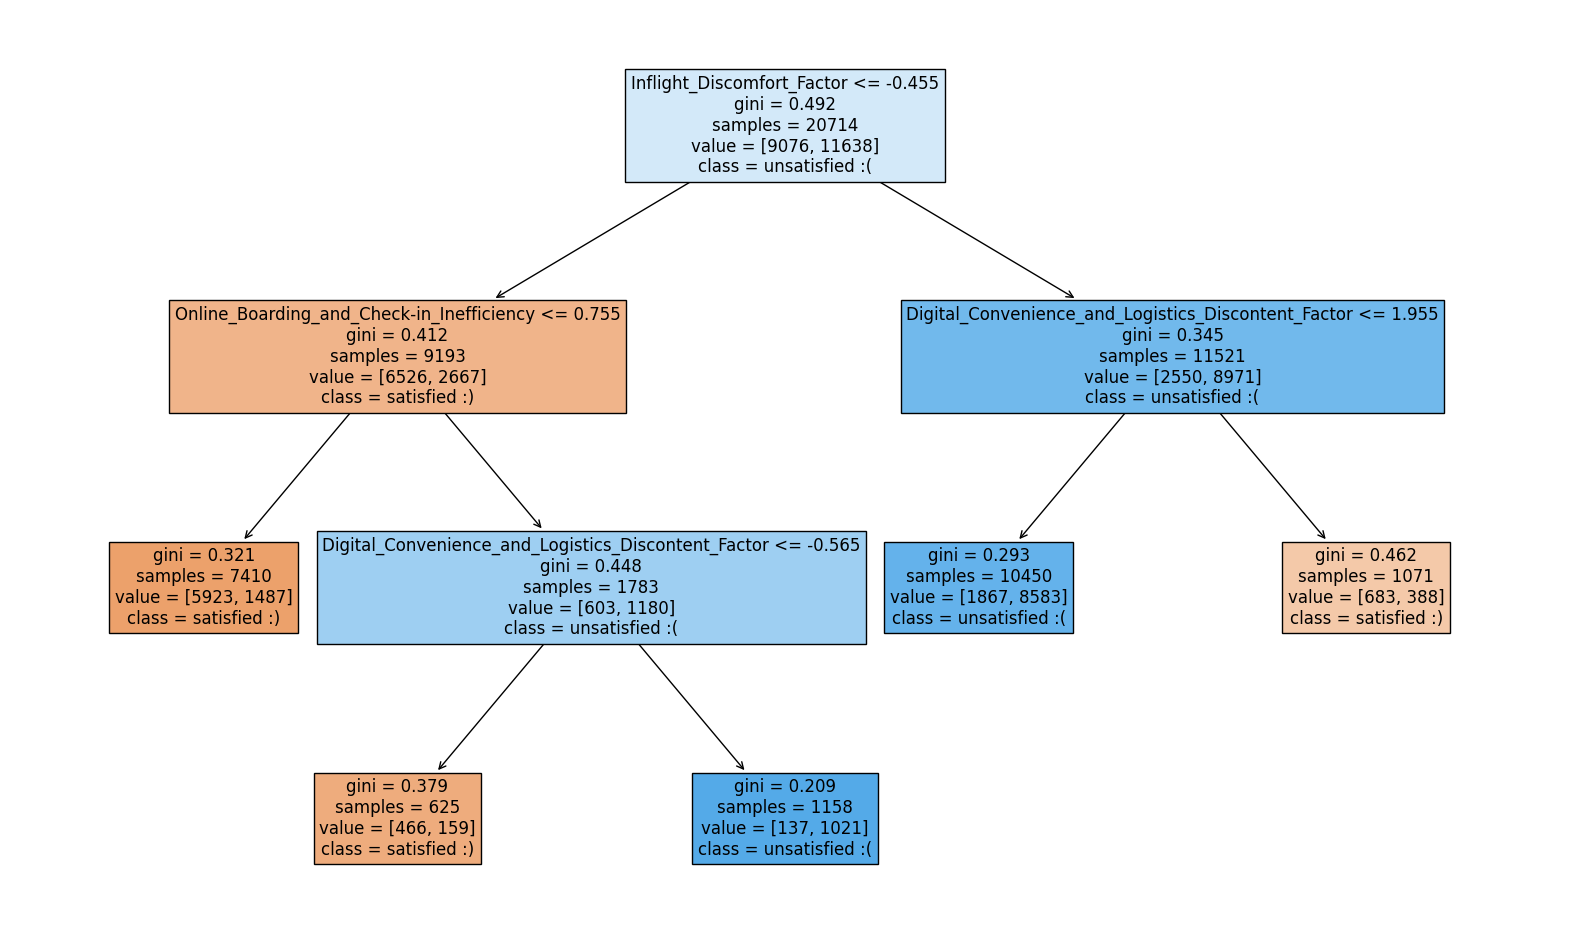

In [82]:
fig = plt.figure(figsize=(20,12))
# define class names
cnames = ['satisfied :)','unsatisfied :(']
tree.plot_tree(clf, fontsize=12, feature_names = X_train.columns, class_names=cnames, filled=True);

In [54]:
%%capture
!pip install dtreeviz
import dtreeviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


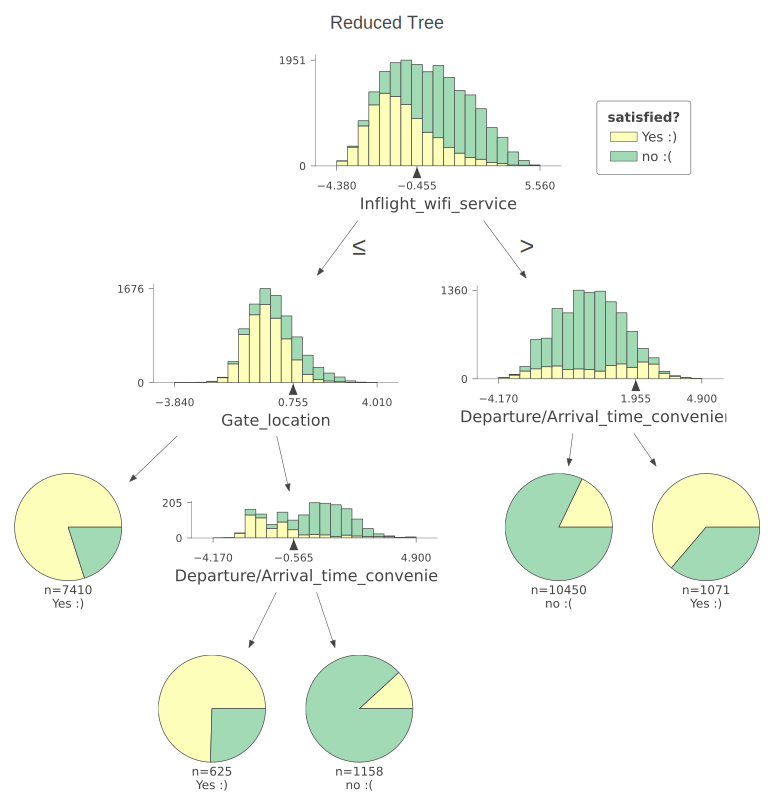

In [55]:
viz = dtreeviz.model(clf,
               X_train=X_train,
               y_train=y_train,
               target_name='satisfied?',
               feature_names=X.columns,
               class_names=['Yes :)', 'no :(']);
viz.view(title="Reduced Tree",
         scale=1.8)

In [56]:
isabel = pd.DataFrame([
    {
        'Inflight_Discomfort_Factor': -2.57,
        'Digital_Convenience_and_Logistics_Discontent_Factor':-1.06,
        'Service_Quality_Discontent_Factor':-1.11,
        'Online_Boarding_and_Check-in_Inefficiency':0.89,
        'Age': 54,
        'Gender': 0,
        'Type_of_Travel': 1,
        'Class': 0,
        'Customer_Type': 0,
        'Flight_Distance': 192,
        'Departure_Delay_in_Minutes': 0
    }
])

In [57]:
isabel_series = isabel.iloc[0]

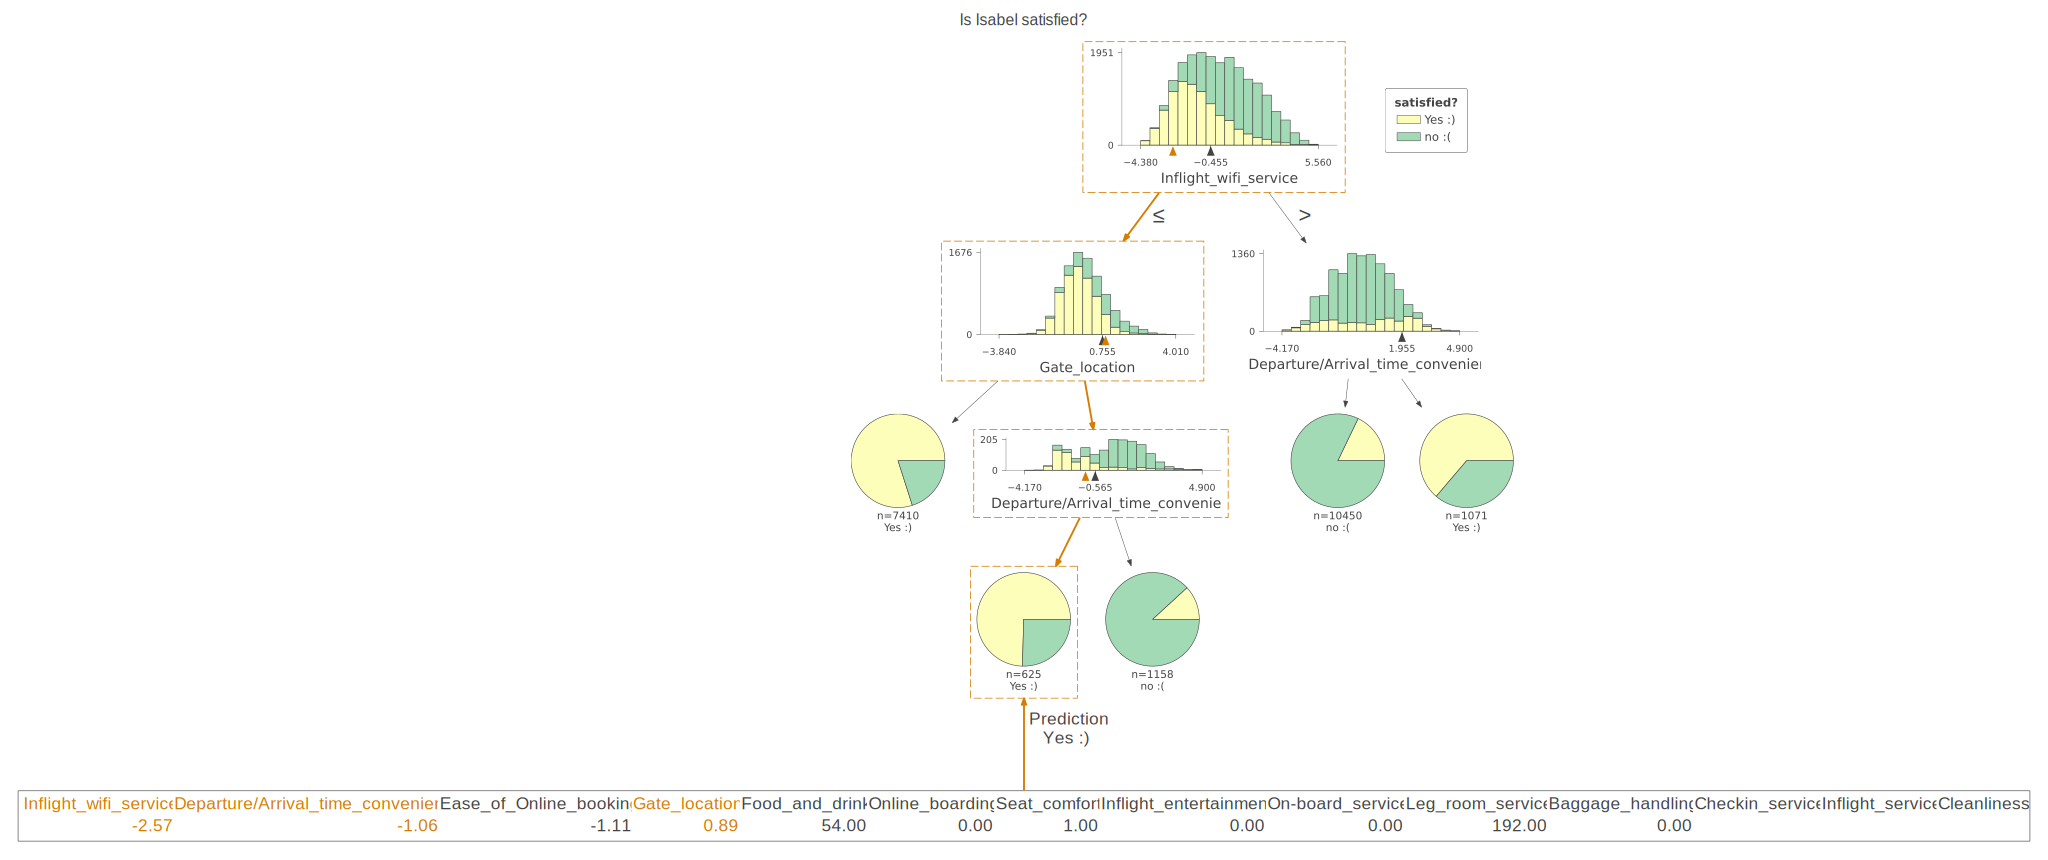

In [58]:
viz.view(title="Is Isabel satisfied?",
         scale=1.8,
         x=isabel_series)

# Pruning the full tree

In [59]:
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas

In [60]:
clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    my_clf.fit(X_train, y_train)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.404014095176178e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.0946492276993405e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.1647946101938584e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.169671027158711e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.179185987090156e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.181441688798026e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.182568681970719e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.187188253148993e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.1894402851243585e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.190448803791589e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.196689013045088e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.200044138539833e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.20234302082328e-05, random_state

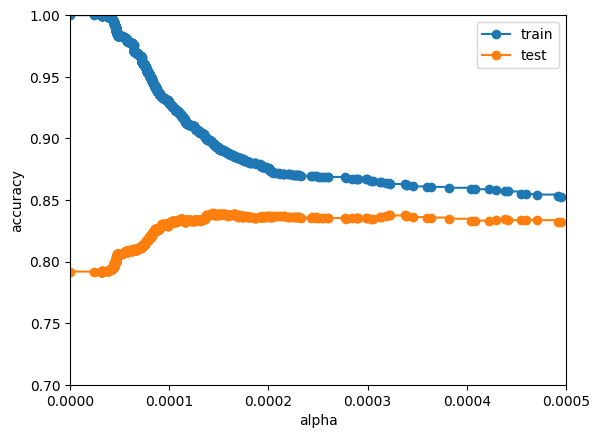

In [61]:
#train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
#test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

# BTW, there is also an alternative function: score() that does the same thing
train_scores = [x.score(X_train, y_train) for x in clfs]
test_scores = [x.score(X_test, y_test) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
plt.xlim(0,0.0005)
plt.ylim(0.70,1)
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
final_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00019)
final_clf.fit(X_train, y_train)
# Confusion matrix of "final" tree
y_pred_final = final_clf.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred_final)*100, "%")
print("This is an improvement over the full tree!\n")

print("Confusion Matrix of final reduced pruned tree on test data:")
confusion_matrix(y_test, y_pred_final)

Accuracy score of reduced tree on test data : 83.51033017957134 %
This is an improvement over the full tree!

Confusion Matrix of final reduced pruned tree on test data:


array([[1832,  457],
       [ 397, 2493]])

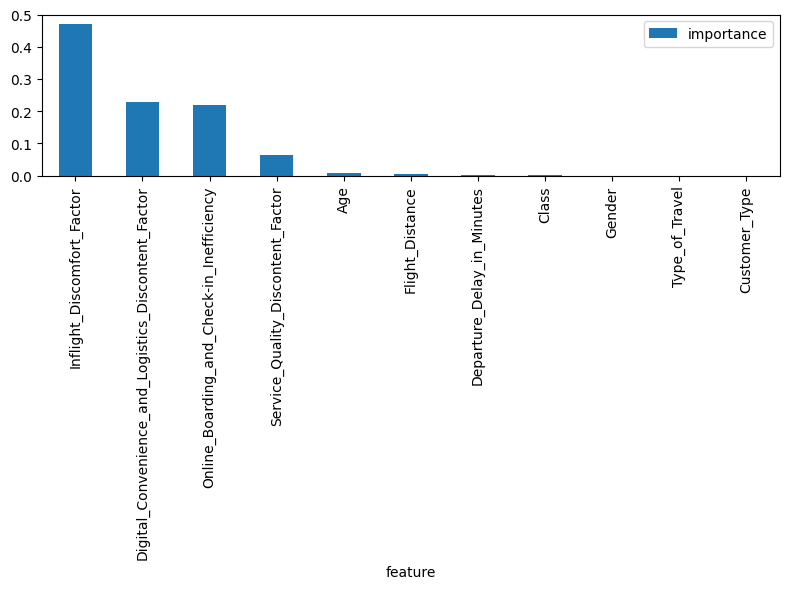

In [63]:
importances = final_clf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature', figsize=(8, 6))
ax.set_ylim(0, 0.5)
ax.set_yticks(np.arange(0, 0.51, 0.1))

plt.tight_layout()
plt.show()

In [64]:
accuracy_scores = cross_val_score(final_clf, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in accuracy_scores])
print('5-fold cross-validation mean accuracy:', round(accuracy_scores.mean(),3))

Accuracy scores of each fold:  ['0.843', '0.839', '0.839', '0.839', '0.840']
5-fold cross-validation mean accuracy: 0.84


In [65]:
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [20, 50, 100, 200],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

# Then, use the GridSearchCV function which combines gridsearch with
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.843004641059431
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 20}


In [66]:
clf = DecisionTreeClassifier(
      max_depth=10,
      min_samples_leaf = 20,
      min_impurity_decrease = 0,
      )
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0,
                       min_samples_leaf=20)

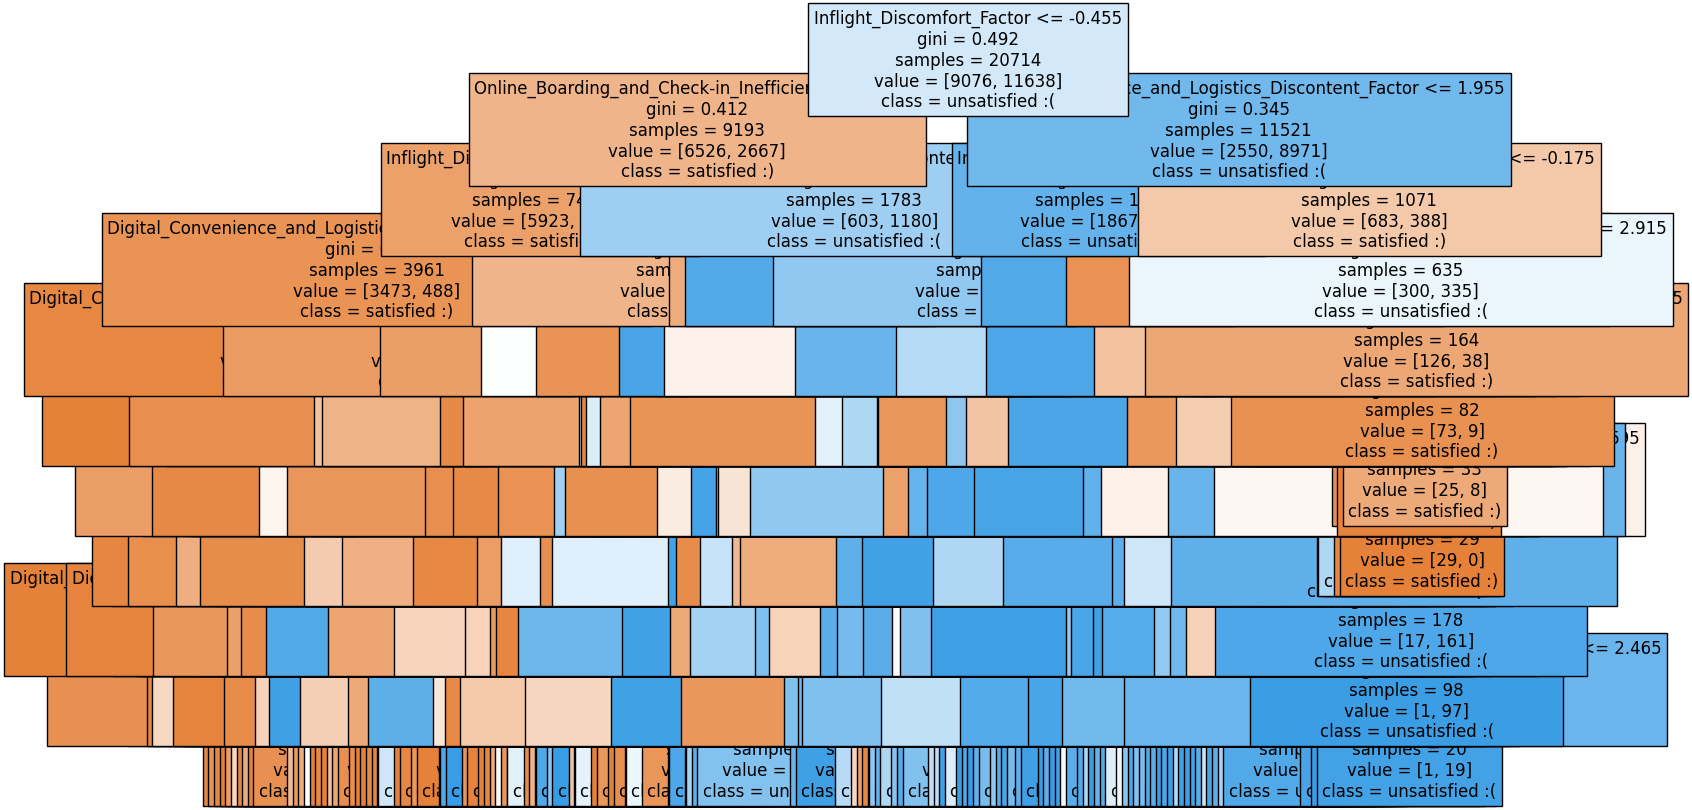

In [67]:
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['satisfied :)','unsatisfied :(']
tree.plot_tree(clf, fontsize=12, feature_names = X_train.columns, class_names=cnames, filled=True);

In [89]:
!pip install graphviz

In [90]:
# Code to view the above decision tree clearly, in a pdf format (downloaded to the local files folder).

from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a graphviz format
dot_data = export_graphviz(final_clf,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=["satisfied", "unsatisfied"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=0,
    criterion='gini',
    n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [70]:
print(accuracy_score(y_test, rf.predict(X_test)))
confusion_matrix(y_test, rf.predict(X_test))

0.8540258737207955


array([[1880,  409],
       [ 347, 2543]])

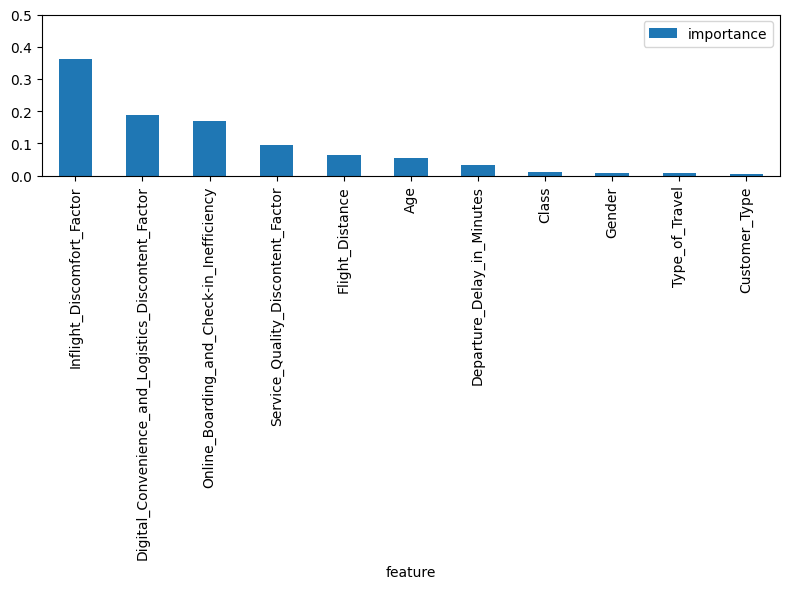

In [71]:
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature', figsize=(8, 6))
ax.set_ylim(0, 0.5)
ax.set_yticks(np.arange(0, 0.51, 0.1))

plt.tight_layout()
plt.show()

# Neural Networks

In [72]:
# import required packages
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part

# Special package to report regression summary statistics
!pip install -U dmba;
from dmba import regressionSummary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.0 MB/s eta 0:00:00
Colab environment detected.


In [73]:
from sklearn.neural_network import MLPClassifier


In [91]:
# Currently takes too long to run

mlp = MLPClassifier(random_state=0)
param_grid = {
    'hidden_layer_sizes': [(15,),(50,),(15,10),(20,15,10),],
    'activation': ['relu','logistic','tanh'],
    'solver': ['adam','sgd'],
    'alpha': [0.01, 0.4, 0.05, 0.055],
}

clf = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3, verbose = 3)
clf.fit(X_train, y_train.ravel())

print('Best parameters found:\n', clf.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


KeyboardInterrupt: 

In [ ]:
mlp = MLPClassifier(random_state=0,activation = 'relu', alpha = 0.055, hidden_layer_sizes =  (20,15,10), solver =  'adam')

In [ ]:
mlp.fit(X_train, y_train)

In [ ]:
y_pre = mlp.predict(X_test)

In [ ]:
confusion_NN = confusion_matrix(y_test.ravel(),y_pre)
confusion_NN

In [ ]:
accuracy_score(y_test.ravel(),y_pre)